# Orthogonal Projections

We will write functions that will implement orthogonal projections.

## Learning objectives

1. Write code that projects data onto lower-dimensional subspaces.
2. Understand the real world applications of projections.

As always, we will first import the packages that we need for this assignment.

In [1]:
# PACKAGE: DO NOT EDIT THIS CELL
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

Next, we will retrieve the Olivetti faces dataset.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from ipywidgets import interact
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces('./')
faces = dataset.data

### Advice for testing numerical algorithms
Before we begin this week's assignment, there are some advice that we would like to give for writing functions that work with numerical data. They are useful for finding bugs in your implementation.

Testing machine learning algorithms (or numerical algorithms in general)
is sometimes really hard as it depends on the dataset
to produce an answer, and you will never be able to test your algorithm on all the datasets
we have in the world. Nevertheless, we have some tips for you to help you identify bugs in
your implementations.

#### 1. Test on small dataset
Test your algorithms on small dataset: datasets of size 1 or 2 sometimes will suffice. This
is useful because you can (if necessary) compute the answers by hand and compare them with
the answers produced by the computer program you wrote. In fact, these small datasets can even have special numbers,
which will allow you to compute the answers by hand easily.

#### 2. Find invariants
Invariants refer to properties of your algorithm and functions that are maintained regardless
of the input. We will highlight this point later in this notebook where you will see functions,
which will check invariants for some of the answers you produce.

Invariants you may want to look for:
1. Does your algorithm always produce a positive/negative answer, or a positive definite matrix?
2. If the algorithm is iterative, do the intermediate results increase/decrease monotonically?
3. Does your solution relate with your input in some interesting way, e.g. orthogonality? 

Finding invariants is hard, and sometimes there simply isn't any invariant. However, DO take advantage of them if you can find them. They are the most powerful checks when you have them.

We can find some invariants for projections. In the cell below, we have written two functions which check for invariants of projections. See the docstrings which explain what each of them does. You should use these functions to test your code.

In [3]:
import numpy.testing as np_test
def test_property_projection_matrix(P):
    """Test if the projection matrix satisfies certain properties.
    In particular, we should have P @ P = P, and P = P^T
    """
    np_test.assert_almost_equal(P, P @ P)
    np_test.assert_almost_equal(P, P.T)

def test_property_projection(x, p):
    """Test orthogonality of x and its projection p."""
    np_test.assert_almost_equal(p.T @ (p-x), 0)

## 1. Orthogonal Projections

Recall that for projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

To perform step 1, you need to complete the function `projection_matrix_1d` and `projection_matrix_general`. To perform step 2, complete `project_1d` and `project_general`.

### Projection (1d)

Recall that you can use `np.dot(a, b)` or `a@b` to perform matrix-matrix or matrix-vector multiplication. `a*b` shall compute the element-wise product of $\boldsymbol a$ and $\boldsymbol b$.

You may find the function [np.outer()](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) useful.

Remember that the transpose operation does not do anything for 1 dimensional arrays. So you cannot compute $\boldsymbol b\boldsymbol b^T$ using `np.dot(b, b.T)`.

In [14]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE
    ### Uncomment and modify the code below
    D, = b.shape
    ### Edit the code below to compute a projection matrix of shape (D,D)
    P = np.zeros((D, D)) # <-- EDIT THIS
    b = b.reshape(D,1)
    P = (b @ b.T)/(np.linalg.norm(b)**2)
    # You may be tempted to follow the formula and implement bb^T as b @ b.T in numpy.
    # However, notice that this b is a 1D ndarray, so b.T is an no-op. Use np.outer instead
    # to implement the outer product.
    return P 

With the help of the function `projection_matrix_1d`, you should be able 
to implement `project_1d`.

In [15]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D,) projection of x in space spanned by b
    """
    # YOUR CODE HERE
    ### Uncomment and modify the code below
    p = np.zeros((3,)) # <-- EDIT THIS
    mat = projection_matrix_1d(b)
    p = mat @ x
    return p

In [18]:
# Test 1D
# Test that we computed the correct projection matrix
from numpy.testing import assert_allclose

assert_allclose(
    projection_matrix_1d(np.array([1, 2, 2])), 
    np.array([[1,  2,  2],
              [2,  4,  4],
              [2,  4,  4]]) / 9
)

# Some hidden tests below


array([[1, 0],
       [1, 1],
       [1, 2]])

In [19]:
# Test that we project x on to the 1d subspace correctly
assert_allclose(
    project_1d(np.ones(3), np.array([1, 2, 2])),
    np.array([5, 10, 10]) / 9
)

# Some hidden tests below


### Projection (ND)

You may find the function [np.linalg.inv()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) useful.

In [20]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE
    ### Uncomment and modify the code below
    P = np.eye(B.shape[0]) # <-- EDIT THIS
    P = B @ np.linalg.inv(B.T@B)@B.T
    return P

In [21]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    # YOUR CODE HERE
    # Uncomment and modify the code below
    p = np.zeros(x.shape) # <-- EDIT THIS
    p = projection_matrix_general(B) @ x
    return p

Remember our discussion earlier about invariants? In the next cell, we will check that these invariants hold for the functions that you have implemented earlier.

In [22]:
from numpy.testing import assert_allclose

B = np.array([[1, 0],
              [1, 1],
              [1, 2]])

assert_allclose(
    projection_matrix_general(B), 
    np.array([[5,  2, -1],
              [2,  2,  2],
              [-1, 2,  5]]) / 6
)

# Some hidden tests below


In [23]:
# Test 2D
# Test that we computed the correct projection matrix

# Test that we project x on to the 2d subspace correctly
assert_allclose(
    project_general(np.array([6, 0, 0]).reshape(-1,1), B), 
    np.array([5, 2, -1]).reshape(-1,1)
)

# Some hidden tests below


## 2. Eigenfaces  (optional)

Next, you will see what happens if you project a dataset consisting of human faces onto a subset of a basis we call the "eigenfaces". This technique of projecting the data onto a subspace with smaller dimension, and thus reducing the number of coordinates required to represent the data, is widely used in machine learning. It can help identify trends and relationships between variables that are otherwise hidden away.

We have already prepared the eigenfaces basis using Principle Component Analysis (PCA), which finds the best possible basis to represent this smaller subspace. Next week you will derive PCA and implement the PCA algorithm, but for now you'll simply see the results.

As always, let's import the packages that we need.

In [24]:
from sklearn.datasets import fetch_olivetti_faces
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces(data_home='./')
faces = dataset.data

Each face of the dataset is a gray scale image of size (64, 64). Let's visualize some faces in the dataset.

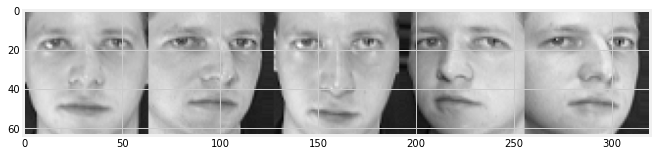

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(faces[:5].reshape(5,64,64)), cmap='gray');

In [26]:
# for numerical reasons which you shall see in week 4, we normalize the dataset
mean = faces.mean(axis=0)
std = faces.std(axis=0)
faces_normalized = (faces - mean) / std

The data for the basis has been saved in a file named `eigenfaces.npy`, first we load it into the variable B.

In [27]:
B = np.load('eigenfaces.npy')[:50] # we use the first 50 basis vectors --- you should play around with this.
print("the eigenfaces have shape {}".format(B.shape))

the eigenfaces have shape (50, 64, 64)


Each instance in $\boldsymbol B$ is a `64x64' image, an "eigenface", which we determined using an algorithm called Principal Component Analysis. Let's visualize 
a few of those "eigenfaces".

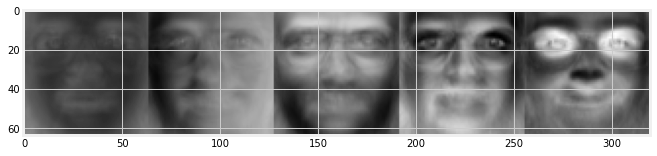

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(B[:5].reshape(-1, 64, 64)), cmap='gray');

Take a look at what happens if we project our faces onto the basis $\boldsymbol B$ spanned by these 50 "eigenfaces". In order to do this, we need to reshape $\boldsymbol B$ from above, which is of size (50, 64, 64), into the same shape as the matrix representing the basis as we have done earlier, which is of size (4096, 50). Here 4096 is the dimensionality of the data and 50 is the number of data points. 

Then we can reuse the functions we implemented earlier to compute the projection matrix and the projection. Complete the code below to visualize the reconstructed faces that lie on the subspace spanned by the "eigenfaces".

In [29]:
@interact(i=(0, 10))
def show_face_face_reconstruction(i):
    original_face = faces_normalized[i].reshape(64, 64)
    # reshape the data we loaded in variable `B` 
    B_basis = B.reshape(B.shape[0], -1).T
    face_reconstruction = project_general(faces_normalized[i], B_basis).reshape(64, 64)
    plt.figure()
    plt.imshow(np.hstack([original_face, face_reconstruction]), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=5, description='i', max=10), Output()), _dom_classes=('widget-interact',…

What would happen to the reconstruction as we increase the dimension of our basis? 

Modify the code above to visualize it.

In the above you used a specially selected basis for your projections. What happens if you simply use a random basis instead?

Below, you will project the data onto 50 randomly generated basis vectors. Before you run the code cells below, can you predict the results?

In [30]:
B_random = np.random.randn(*B.shape)
print("the random basis has shape {}".format(B_random.shape))

the random basis has shape (50, 64, 64)


As before, we shall visualize the "faces" represented by the basis vectors.

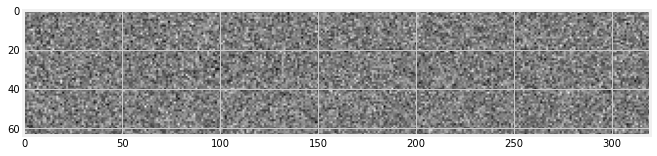

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(B_random[:5].reshape(-1, 64, 64)), cmap='gray');

As you can see, the basis vectors do not store faces but only store random noise.

Let us now try to project the faces onto this basis.

In [32]:
@interact(i=(0, 10))
def show_face_face_reconstruction(i):
    original_face = faces_normalized[i].reshape(64, 64)
    # reshape the data we loaded in variable `B` 
    B_basis = B_random.reshape(B_random.shape[0], -1).T
    face_reconstruction = project_general(faces_normalized[i], B_basis).reshape(64, 64)
    plt.figure()
    plt.imshow(np.hstack([original_face, face_reconstruction]), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=5, description='i', max=10), Output()), _dom_classes=('widget-interact',…

Were these the results you expected? You can see how important it is to use a technique like PCA when selecting your basis for projection!

## 3. Least squares regression (optional)

In this section, we shall apply the concept of projection to finding the optimal parameters of a least squares regression model.

Consider the case where we have a linear model for predicting housing prices. We are predicting the housing prices based on features in the 
housing dataset. If we denote the features as $\boldsymbol x_0, \dotsc, \boldsymbol x_n$ and collect them into a vector $\boldsymbol {x}$, and the price of the houses as $y$. Assume that we have 
a prediction model in the way such that $\hat{y}_i =  f(\boldsymbol {x}_i) = \boldsymbol \theta^T\boldsymbol {x}_i$.


If we collect the dataset into a $(N,D)$ data matrix $\boldsymbol X$ (where $N$ is the number of houses and $D$ is the number of features for each house), we can write down our model like this:

$$
\begin{bmatrix} 
\boldsymbol{x}_1^T \\
\vdots \\ 
\boldsymbol{x}_N^T 
\end{bmatrix} \boldsymbol{\theta} = \begin{bmatrix} 
y_1 \\
\vdots \\ 
y_2 
\end{bmatrix},
$$

i.e.,

$$
\boldsymbol X\boldsymbol{\theta} = \boldsymbol{y}.
$$

Note that the data points are the *rows* of the data matrix, i.e., every column is a dimension of the data. 

Our goal is to find the best $\boldsymbol\theta$ such that we minimize the following objective (least square).

$$
\begin{eqnarray} 
& \sum^n_{i=1}{\lVert \bar{y_i} - y_i \rVert^2} \\
&= \sum^n_{i=1}{\lVert \boldsymbol \theta^T\boldsymbol{x}_i - y_i \rVert^2} \\
&= (\boldsymbol X\boldsymbol {\theta} - \boldsymbol y)^T(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y).
\end{eqnarray}
$$

If we set the gradient of the above objective to $\boldsymbol  0$, we have
$$
\begin{eqnarray} 
\nabla_\theta(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y)^T(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\nabla_\theta(\boldsymbol {\theta}^T\boldsymbol X^T - \boldsymbol y^T)(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\nabla_\theta(\boldsymbol {\theta}^T\boldsymbol X^T\boldsymbol X\boldsymbol {\theta} - \boldsymbol y^T\boldsymbol X\boldsymbol \theta - \boldsymbol \theta^T\boldsymbol X^T\boldsymbol y + \boldsymbol y^T\boldsymbol y ) &=& \boldsymbol 0 \\
2\boldsymbol X^T\boldsymbol X\theta - 2\boldsymbol X^T\boldsymbol y &=& \boldsymbol 0 \\
\boldsymbol X^T\boldsymbol X\boldsymbol \theta        &=& \boldsymbol X^T\boldsymbol y.
\end{eqnarray}
$$

The solution that gives zero gradient solves (which we call the maximum likelihood estimator) the following equation:

$$\boldsymbol X^T\boldsymbol X\boldsymbol \theta = \boldsymbol X^T\boldsymbol y.$$

_This is exactly the same as the normal equation we have for projections_.

This means that if we solve for $\boldsymbol X^T\boldsymbol X\boldsymbol \theta = \boldsymbol X^T\boldsymbol y.$ we would find the best $\boldsymbol \theta = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y$, i.e. the $\boldsymbol \theta$ which minimizes our objective.


Let's put things into perspective. Consider that we want to predict the true coefficient $\boldsymbol \theta$ 
of the line $\boldsymbol y = \boldsymbol \theta^T \boldsymbol x$ given only $\boldsymbol X$ and $\boldsymbol y$. We do not know the true value of $\boldsymbol \theta$.

Below, in a two dimensional plane, we shall generate 50 points on a line passing through the origin and with $\boldsymbol \theta$ (which is slope in this case) = 2. Then, we shall add some noise to all the points so that all the points do not end up being on the same line (if all the points are on the same line, it would make finding $\boldsymbol \theta$ extremely easy).

Note: In this particular example, $\boldsymbol \theta$ is a scalar. Still, we can represent it as an $\mathbb{R}^1$ vector.

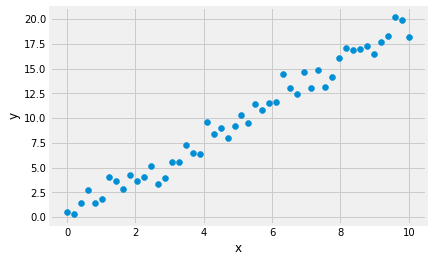

In [33]:
x = np.linspace(0, 10, num=50)
theta = 2
def f(x):    
    random = np.random.RandomState(42) # we use the same random seed so we get deterministic output
    return theta * x + random.normal(scale=1.0, size=len(x)) # our observations are corrupted by some noise, so that we do not get (x,y) on a line

y = f(x)
plt.scatter(x, y);
plt.xlabel('x');
plt.ylabel('y');

Now, we shall calculate $\hat{\boldsymbol  \theta}$ using the formula which we derived above.

In [34]:
X = x.reshape(-1,1) # size N x 1
Y = y.reshape(-1,1) # size N x 1

# maximum likelihood estimator
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
print('Inferred slope =', theta_hat[0, 0])

Inferred slope = 1.951585423289831


We can show how our $\hat{\boldsymbol  \theta}$ fits the line.

theta = 2.000000
theta_hat = 1.951585


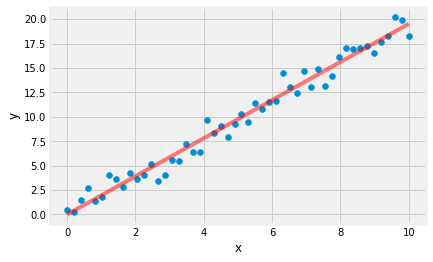

In [35]:
fig, ax = plt.subplots()
ax.scatter(x, y);
xx = [0, 10]
yy = [0, 10 * theta_hat[0,0]]
ax.plot(xx, yy, 'red', alpha=.5);
ax.set(xlabel='x', ylabel='y');
print("theta = %f" % theta)
print("theta_hat = %f" % theta_hat)

Suppose that we calculate $\hat{\boldsymbol  \theta}$ multiple times, each time taking increasing number of datapoints into consideration. How would you expect  $\lVert \hat{\boldsymbol  \theta} - \boldsymbol \theta \rVert$ to vary as the number of datapoints increases?

Make your hypothesis, and complete the code below to confirm it!

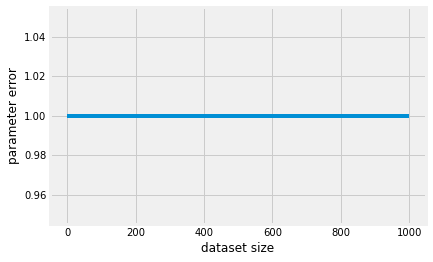

In [38]:
N = np.arange(2, 10000, step=10)
# Your code comes here, which calculates \hat{\theta} for different dataset sizes.

theta_error = np.zeros(N.shape)

theta_error = np.ones(N.shape) # <-- EDIT THIS


plt.plot(theta_error)
plt.xlabel("dataset size")
plt.ylabel("parameter error"); 

As you can see, $\lVert \hat{\boldsymbol  \theta} - \boldsymbol \theta \rVert$ generally decreases with an incrase in the dataset size.